In [8]:
import sqlite3

# Connect to database (creates file if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ('Laptop', 5, 700),
    ('Mouse', 20, 25),
    ('Keyboard', 10, 45),
    ('Monitor', 7, 150),
    ('Laptop', 3, 700),
    ('Mouse', 15, 25),
    ('Laptop', 4, 700),
    ('Mouse', 30, 25),
    ('Keyboard', 12, 45),
    ('Monitor', 5, 150),
    ('Headphones', 8, 80),
    ('Webcam', 10, 55),
    ('Mouse', 25, 25),
    ('Keyboard', 7, 45),
    ('Laptop', 6, 700),
    ('Monitor', 9, 150),
    ('Laptop', 2, 700),
    ('Webcam', 6, 55),
    ('Headphones', 10, 80),
    ('Mouse', 40, 25),
    ('Monitor', 4, 150),
    ('Keyboard', 15, 45),
    ('Headphones', 5, 80),
    ('Webcam', 8, 55)
]

cursor.executemany('INSERT INTO sales_data (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()
conn.close()


      product  total_qty  revenue
0  Headphones         23   1840.0
1    Keyboard         44   1980.0
2      Laptop         20  14000.0
3     Monitor         25   3750.0
4       Mouse        130   3250.0
5      Webcam         24   1320.0


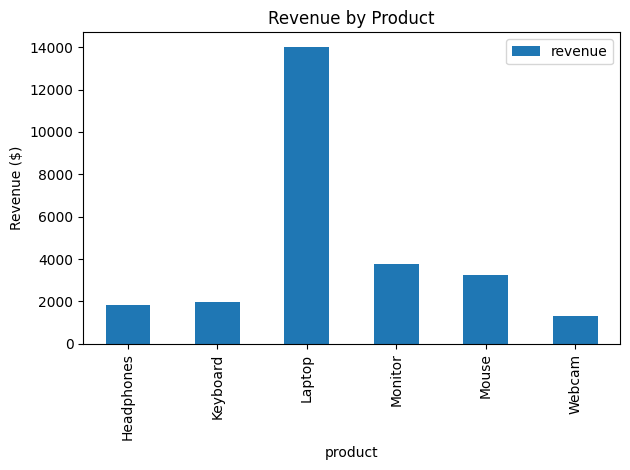

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# Run SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales_data
GROUP BY product
"""

# Load result into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print the DataFrame
print(df)

# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product')
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # optional
plt.show()
